Purpose: Visualize accuracy and F1 scores for the final genes-as-features and dimensional reduction-WGCNA binary classification models.<br>
Author: Anna Pardo<br>
Date initiated: August 1, 2023

In [1]:
# import modules
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# load data: scores json files for genes-as-features models
## set directory
directory = "../../data/rf_outputs/upsample_13-Jul-2023/"

In [3]:
# iterate through subdirectories, pull out scores, and load them into a dictionary of dictionaries
## actually...write a function to do this
def load_scores(d):
    dictionary = {}
    for subd in os.listdir(d):
        for f in os.listdir(d+subd):
            if f.endswith("_scores.json"):
                s = f.strip().split("Test")[0]
                dictionary[s] = json.load(open(d+subd+"/"+f))
    return dictionary

In [5]:
gaf = load_scores(directory)

In [7]:
# set directory for dimensional reduction models' results
ddr = "../../data/rf_outputs/dimensional_reduction_rf_01-Aug-2023/"

In [8]:
dr = load_scores(ddr)

In [9]:
pd.DataFrame(dr)

,Flooding,Low_Nitrogen,Heat,Drought,Cold,Salt
Accuracy,0.710145,0.489933,0.564232,0.71269,0.481013,0.517857
F1_class_0,0.6,0.464789,0.375451,0.613915,0.513834,0.509091
F1_class_1,0.772727,0.512821,0.665377,0.771221,0.443439,0.526316
Precision_class_0,0.517241,0.478261,0.776119,0.632022,0.505837,0.5
Precision_class_1,0.85,0.5,0.521212,0.758347,0.451613,0.535714
Recall_class_0,0.714286,0.452055,0.247619,0.596817,0.522088,0.518519
Recall_class_1,0.708333,0.526316,0.919786,0.784539,0.435556,0.517241
AUC,0.784226,0.5438,0.778266,0.765219,0.46896,0.489144
Data Balanced,False,False,False,False,False,False
Sampling,Up,Up,Up,Up,Up,Up


In [10]:
# convert the dictionaries to dataframes
drdf = pd.DataFrame(dr).transpose().reset_index().rename(columns={"index":"Test_Set"})
gafdf = pd.DataFrame(gaf).transpose().reset_index().rename(columns={"index":"Test_Set"})

In [12]:
gafdf

,Test_Set,Accuracy,F1_class_0,F1_class_1,Precision_class_0,Precision_class_1,Recall_class_0,Recall_class_1,AUC,Data Balanced,Sampling
0,Flooding,0.594203,0.3,0.714286,0.315789,0.7,0.285714,0.729167,0.485119,False,Up
1,Low_Nitrogen,0.543624,0.521127,0.564103,0.536232,0.55,0.506849,0.578947,0.613735,False,Up
2,Heat,0.586902,0.561497,0.609524,0.640244,0.549356,0.5,0.684492,0.631487,False,Up
3,Drought,0.809766,0.76537,0.840034,0.72619,0.872114,0.809019,0.810231,0.845922,False,Up
4,Cold,0.647679,0.595642,0.68785,0.75,0.593548,0.493976,0.817778,0.670219,False,Up
5,Salt,0.839286,0.8,0.865672,1.0,0.763158,0.666667,1.0,0.965517,False,Up


<AxesSubplot: xlabel='Test_Set', ylabel='Accuracy'>

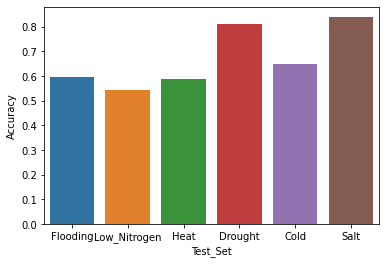

In [13]:
sns.barplot(data=gafdf,x="Test_Set",y="Accuracy")

In [20]:
# write a plotting function for accuracy
def plot_accuracy(df):
    # for later, calculate mean accuracy and append as a column
    df["Mean Accuracy"] = sum(df["Accuracy"])/len(df["Accuracy"])
    # plot the bar plot
    sns.barplot(data=df,x="Test_Set",y="Accuracy",color="steelblue")
    # plot the mean line
    sns.lineplot(data=df,x="Test_Set",y="Mean Accuracy",color="green")
    plt.title("Accuracy")

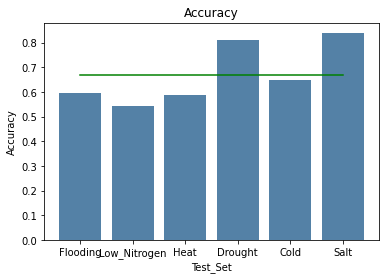

In [21]:
plot_accuracy(gafdf)

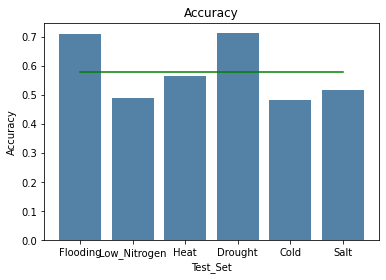

In [22]:
plot_accuracy(drdf)

In [24]:
gafdf.iloc[1,0]

'Low_Nitrogen'

In [27]:
# plotting function for F1
def plot_f1(df):
    # calculate means
    df["Mean F1 control"] = sum(df["F1_class_0"])/len(df["F1_class_0"])
    df["Mean F1 stressed"] = sum(df["F1_class_1"])/len(df["F1_class_1"])
    # reformat data
    df = df[["Test_Set","F1_class_0","F1_class_1","Mean F1 control","Mean F1 stressed"]]
    sc = []
    t = []
    mean = []
    f1 = []
    for i in range(len(df.index)):
        sc.append("Stressed")
        t.append(df.iloc[i,0])
        mean.append(df.iloc[i,4])
        f1.append(df.iloc[i,2])
        sc.append("Control")
        t.append(df.iloc[i,0])
        mean.append(df.iloc[i,3])
        f1.append(df.iloc[i,1])
    newdf = pd.DataFrame(list(zip(sc,t,f1,mean)),columns=["Condition","Test Set","F1","Mean F1"])
    # plot
    sns.catplot(data=newdf,kind="bar",x="Test Set",y="F1",hue="Condition")
    sns.lineplot(data=newdf,x="Test Set",y="Mean F1",hue="Condition")
    plt.title("F1")

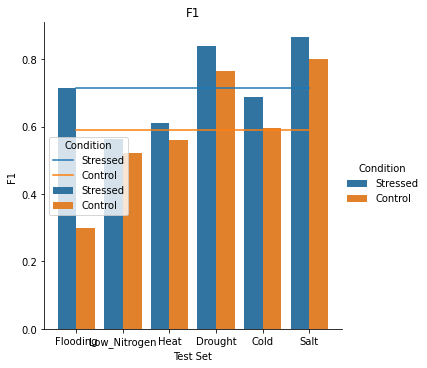

In [28]:
plot_f1(gafdf)

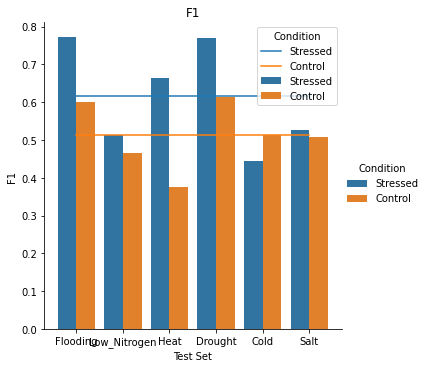

In [29]:
plot_f1(drdf)